In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#if you save the data to your google drive,use this
#from google.colab import drive
#drive.mount('linktoyourdrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loadspreadsheet
df = pd.read_csv('data/bestsellers with categories.csv') #path to your data file

In [30]:
#dataexploration
display(df.head())

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [31]:
print(df.shape)

(550, 7)


In [32]:
print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [33]:
print(df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [34]:
print(df.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


In [35]:
#datacleaning
df.drop_duplicates(inplace=True)

In [36]:
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [37]:
df["Price"] = df["Price"].astype(float)

In [38]:
#checking the changes made
print(df.dtypes)

Title                object
Author               object
Rating              float64
Reviews               int64
Price               float64
Publication Year      int64
Genre                object
dtype: object


In [39]:
#data analysis
#average rating per genre
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean()
print(avg_rating_by_genre)
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


In [40]:
#number of reviews per genre
reviews_per_genre = df.groupby("Genre")["Reviews"].mean()
print(reviews_per_genre)
reviews_per_genre.to_csv("reviews_per_genre.csv")

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64


In [41]:
#number of books per genre
books_per_genre = df['Genre'].value_counts()
print(books_per_genre)
books_per_genre.to_csv("books_per_genre.csv")

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


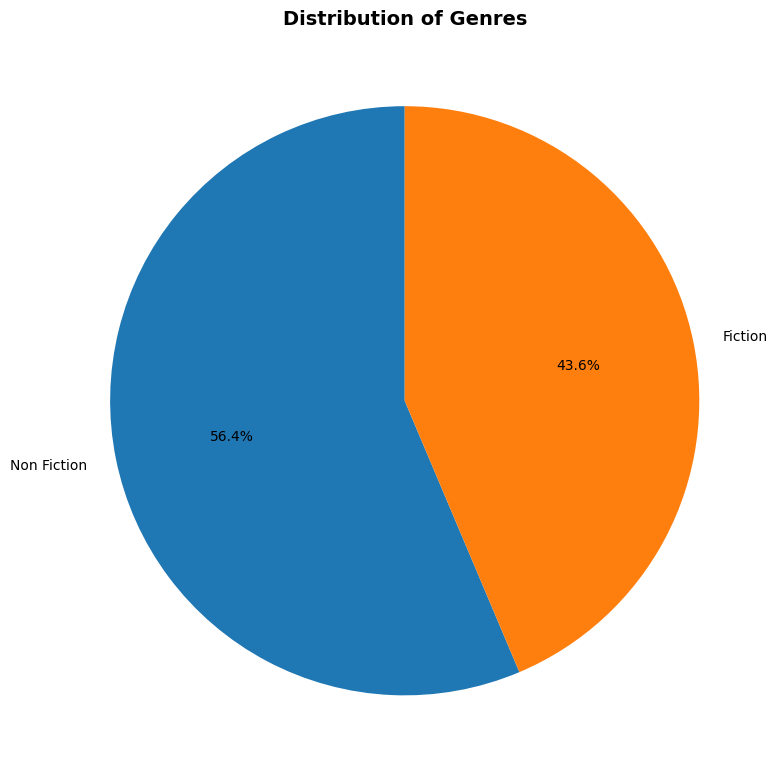

In [42]:
#Pie chart showing genre distribution
plt.figure(figsize=(8, 8))
books_per_genre.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres', fontsize=14, fontweight='bold')
plt.ylabel('') # Remove default y-label for pie chart
plt.tight_layout()

#Save the plot
plt.savefig("genre_distribution.png", bbox_inches='tight')

plt.show()

In [43]:
#number of books by each author
books_per_author = df['Author'].value_counts()
display(books_per_author)
books_per_author.to_csv("books_per_author.csv")

,count
Author,
Jeff Kinney,12
Suzanne Collins,11
Gary Chapman,11
Rick Riordan,11
American Psychological Association,10
...,...
Maurice Sendak,1
Cheryl Strayed,1
The Staff of The Late Show with,1


In [44]:
#list of top 20 authors
top_20_authors = books_per_author.head(20)
display(top_20_authors)
top_20_authors.to_csv("top_20_authors.csv")

,count
Author,
Jeff Kinney,12
Suzanne Collins,11
Gary Chapman,11
Rick Riordan,11
American Psychological Association,10
Dr. Seuss,9
Gallup,9
Rob Elliott,8
Bill O'Reilly,7


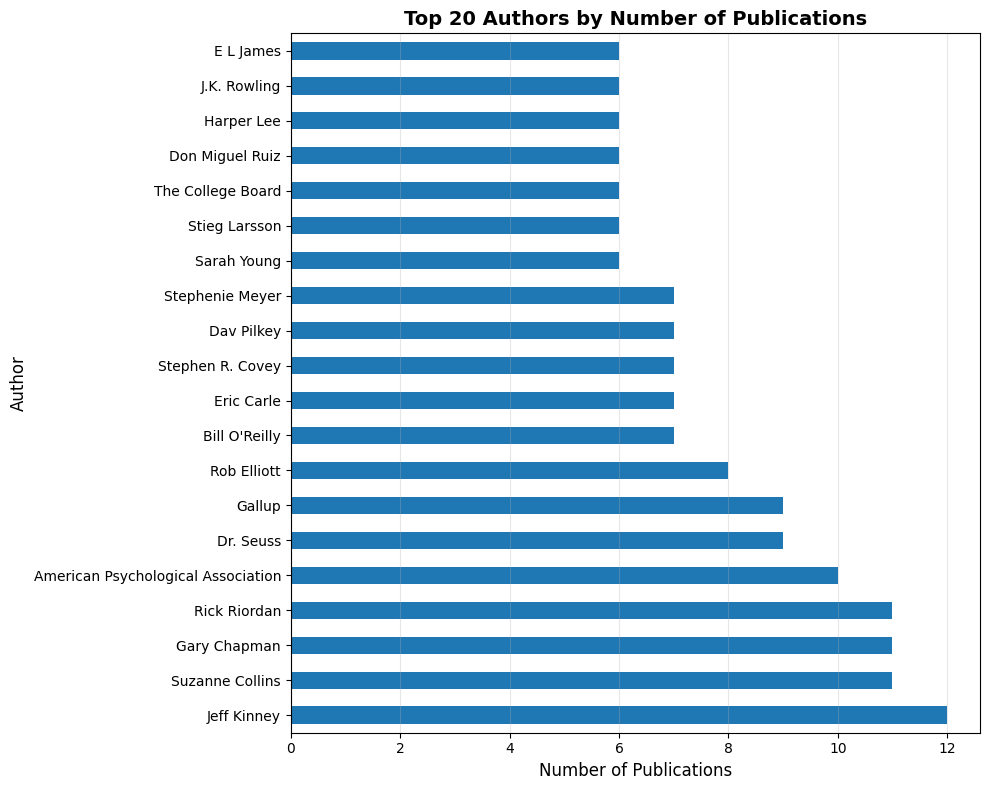

In [45]:
# Horizontal bar plot
plt.figure(figsize=(10, 8))
top_20_authors.plot(kind='barh')
plt.title('Top 20 Authors by Number of Publications', fontsize=14, fontweight='bold')
plt.xlabel('Number of Publications', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig("top_20_authors.png", bbox_inches='tight')

plt.show()